# Multicollinearity and Confidence interval

In linear regression, when explanatory variables are correlated highly each other(this is called multicollinearity), the standard errors of estimates related to the explanatory variables are too large. So the estimates are often regarded insignificant.(To resolve this problem, Lasso or Ridge regression is applied.) Anyway, I wonder whether the estimate's confidence interval also be distorted by multicollinearity.

At first, generate the data set where there is high correlation between explanatory variables. For this work, I used mvtnorm package in R.

In [27]:
set.seed(1)
library(mvtnorm)

In [28]:
cov<-matrix(c(1,0.9,0,0.9,1,0,0,0,1),byrow=TRUE,nrow=3)
cov

1.0,0.9,0
0.9,1.0,0
0.0,0.0,1


In this case, covariance matrix is same with correlation matrix since each variable's variance is 1.

In [29]:
n<-100
df<-rmvnorm(n,mean=c(0,0,0),sigma=cov)
df<-as.data.frame(df)
colnames(df)<-c("x1","x2","x3")
head(df)

x1,x2,x3
-0.43327367,-0.1770985,-0.8356286
1.52670527,1.1264327,-0.8204684
0.80512239,0.8844626,0.5757814
0.54412911,1.1187686,0.3898432
-1.70258904,-2.2064851,1.1249309
-0.04667144,-0.0375820,0.9438362


In [30]:
eps<-rnorm(100)

In [31]:
df$y <- df$x1 + 2*df$x2 + 3*df$x3 + eps

In [32]:
head(df)

x1,x2,x3,y
-0.43327367,-0.1770985,-0.8356286,-2.4006827
1.52670527,1.1264327,-0.8204684,0.2708673
0.80512239,0.8844626,0.5757814,6.2727290
0.54412911,1.1187686,0.3898432,3.5675639
-1.70258904,-2.2064851,1.1249309,-1.0866212
-0.04667144,-0.0375820,0.9438362,4.2218859


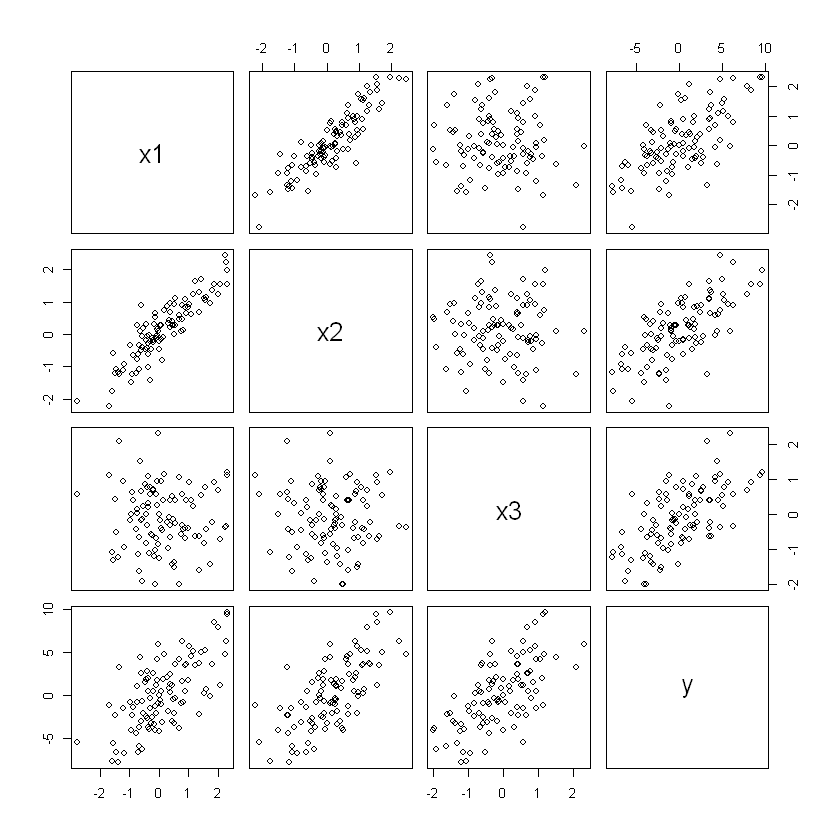

In [33]:
plot(df)

In [34]:
fit<-lm(y~x1+x2+x3,data=df)
summary(fit)


Call:
lm(formula = y ~ x1 + x2 + x3, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.67742 -0.55994 -0.06996  0.69082  2.03786 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.03841    0.10142   0.379 0.705704    
x1           0.87723    0.21815   4.021 0.000115 ***
x2           2.09445    0.24006   8.725 8.13e-14 ***
x3           2.84435    0.11288  25.199  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.9954 on 96 degrees of freedom
Multiple R-squared:  0.9341,	Adjusted R-squared:  0.932 
F-statistic: 453.3 on 3 and 96 DF,  p-value: < 2.2e-16


In this case, x1,x2,x3 are regarded as significant variables. and the confidence intervals include true parameter values.

In [35]:
summary(fit)[[4]][2,1]-1.96*summary(fit)[[4]][2,2] ; summary(fit)[[4]][2,1]+1.96*summary(fit)[[4]][2,2] #confidence interval of x1

[1] 0.4496627

[1] 1.304792

In [36]:
summary(fit)[[4]][3,1]-1.96*summary(fit)[[4]][3,2] ; summary(fit)[[4]][3,1]+1.96*summary(fit)[[4]][3,2] #confidence interval of x2

[1] 1.623937

[1] 2.564956

In [37]:
summary(fit)[[4]][4,1]-1.96*summary(fit)[[4]][4,2] ; summary(fit)[[4]][4,1]+1.96*summary(fit)[[4]][4,2] #confidence interval of x3

[1] 2.62311

[1] 3.065586

and I want to check the variance inflation factor(VIF). For this, I use car package.

In [39]:
library(car)
vif(fit)

x1       x2       x3 
4.910460 4.910725 1.000683

It seems like there is few multicollinearity. and I like to check the coverage of confidence interval. For this, I iterate the upper procedures.

In [43]:
x1_count<-0
x2_count<-0
x3_count<-0
for(i in 1:1000){
    set.seed(i)
    df<-rmvnorm(n,mean=c(0,0,0),sigma=cov)
    df<-as.data.frame(df)
    colnames(df)<-c("x1","x2","x3")
    
    eps<-rnorm(100)
    df$y <- df$x1 + 2*df$x2 + 3*df$x3 + eps
    fit<-lm(y~x1+x2+x3,data=df)
    
    x1_count <- x1_count+(summary(fit)[[4]][2,1]-1.96*summary(fit)[[4]][2,2]<=1)*(1<=summary(fit)[[4]][2,1]+1.96*summary(fit)[[4]][2,2])
    x2_count <- x2_count+(summary(fit)[[4]][3,1]-1.96*summary(fit)[[4]][3,2]<=2)*(2<=summary(fit)[[4]][3,1]+1.96*summary(fit)[[4]][3,2])
    x3_count <- x3_count+(summary(fit)[[4]][4,1]-1.96*summary(fit)[[4]][4,2]<=3)*(3<=summary(fit)[[4]][4,1]+1.96*summary(fit)[[4]][4,2])

}
print(x1_count/1000)
print(x2_count/1000)
print(x3_count/1000)

[1] 0.953
[1] 0.949
[1] 0.941


It seems like the confidence intervals are correct in this case. and I would change the covariance matrix more drastically. and do same thing.

In [48]:
cov<-matrix(c(1,0.99,0.99,0.99,1,0.99,0.99,0.99,1),byrow=TRUE,nrow=3)
cov

1.00,0.99,0.99
0.99,1.00,0.99
0.99,0.99,1.00


In [49]:
x1_count<-0
x2_count<-0
x3_count<-0
for(i in 1:1000){
    set.seed(i)
    df<-rmvnorm(n,mean=c(0,0,0),sigma=cov)
    df<-as.data.frame(df)
    colnames(df)<-c("x1","x2","x3")
    
    eps<-rnorm(100)
    df$y <- df$x1 + 2*df$x2 + 3*df$x3 + eps
    fit<-lm(y~x1+x2+x3,data=df)
    
    x1_count <- x1_count+(summary(fit)[[4]][2,1]-1.96*summary(fit)[[4]][2,2]<=1)*(1<=summary(fit)[[4]][2,1]+1.96*summary(fit)[[4]][2,2])
    x2_count <- x2_count+(summary(fit)[[4]][3,1]-1.96*summary(fit)[[4]][3,2]<=2)*(2<=summary(fit)[[4]][3,1]+1.96*summary(fit)[[4]][3,2])
    x3_count <- x3_count+(summary(fit)[[4]][4,1]-1.96*summary(fit)[[4]][4,2]<=3)*(3<=summary(fit)[[4]][4,1]+1.96*summary(fit)[[4]][4,2])

}
print(x1_count/1000)
print(x2_count/1000)
print(x3_count/1000)

[1] 0.948
[1] 0.943
[1] 0.945


It seems like the confidence intervals are correct regardless with the strength of correlation. and I check the estimates and standard errors of the estimates.

In [50]:
summary(fit)


Call:
lm(formula = y ~ x1 + x2 + x3, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7532 -0.7086 -0.1148  0.7617  2.1174 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.01454    0.10113   0.144 0.886000    
x1           0.62082    0.81161   0.765 0.446192    
x2           2.49884    0.85300   2.929 0.004242 ** 
x3           2.84327    0.78672   3.614 0.000482 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.003 on 96 degrees of freedom
Multiple R-squared:  0.9609,	Adjusted R-squared:  0.9597 
F-statistic: 786.6 on 3 and 96 DF,  p-value: < 2.2e-16


In 1000th iteration, x1 is regarded as insignificant variable. I check VIF in this case.

In [51]:
vif(fit)

x1       x2       x3 
46.42613 48.34922 41.25500

In this case, the VIFs are so high that the multicollinearity is suspected. so I would count how many the confidence interval includes 0(i.e, the variable is regarded as insignificant variable.).

In [52]:
x1_count<-0
x2_count<-0
x3_count<-0
for(i in 1:1000){
    set.seed(i)
    df<-rmvnorm(n,mean=c(0,0,0),sigma=cov)
    df<-as.data.frame(df)
    colnames(df)<-c("x1","x2","x3")
    
    eps<-rnorm(100)
    df$y <- df$x1 + 2*df$x2 + 3*df$x3 + eps
    fit<-lm(y~x1+x2+x3,data=df)
    
    x1_count <- x1_count+(summary(fit)[[4]][2,1]-1.96*summary(fit)[[4]][2,2]<=0)*(0<=summary(fit)[[4]][2,1]+1.96*summary(fit)[[4]][2,2])
    x2_count <- x2_count+(summary(fit)[[4]][3,1]-1.96*summary(fit)[[4]][3,2]<=0)*(0<=summary(fit)[[4]][3,1]+1.96*summary(fit)[[4]][3,2])
    x3_count <- x3_count+(summary(fit)[[4]][4,1]-1.96*summary(fit)[[4]][4,2]<=0)*(0<=summary(fit)[[4]][4,1]+1.96*summary(fit)[[4]][4,2])

}
print(x1_count/1000)
print(x2_count/1000)
print(x3_count/1000)

[1] 0.765
[1] 0.323
[1] 0.058


I compare it with upper case(not drastically correlated case).

In [53]:
cov<-matrix(c(1,0.9,0,0.9,1,0,0,0,1),byrow=TRUE,nrow=3)
cov

1.0,0.9,0
0.9,1.0,0
0.0,0.0,1


In [54]:
x1_count<-0
x2_count<-0
x3_count<-0
for(i in 1:1000){
    set.seed(i)
    df<-rmvnorm(n,mean=c(0,0,0),sigma=cov)
    df<-as.data.frame(df)
    colnames(df)<-c("x1","x2","x3")
    
    eps<-rnorm(100)
    df$y <- df$x1 + 2*df$x2 + 3*df$x3 + eps
    fit<-lm(y~x1+x2+x3,data=df)
    
    x1_count <- x1_count+(summary(fit)[[4]][2,1]-1.96*summary(fit)[[4]][2,2]<=0)*(0<=summary(fit)[[4]][2,1]+1.96*summary(fit)[[4]][2,2])
    x2_count <- x2_count+(summary(fit)[[4]][3,1]-1.96*summary(fit)[[4]][3,2]<=0)*(0<=summary(fit)[[4]][3,1]+1.96*summary(fit)[[4]][3,2])
    x3_count <- x3_count+(summary(fit)[[4]][4,1]-1.96*summary(fit)[[4]][4,2]<=0)*(0<=summary(fit)[[4]][4,1]+1.96*summary(fit)[[4]][4,2])

}
print(x1_count/1000)
print(x2_count/1000)
print(x3_count/1000)

[1] 0.012
[1] 0
[1] 0


So I see the multicollinearity doesn't cause the incorrect confidence interval. But, it can cause the low power in the estimate's significance test. maybe it is caused by long confidence interval. So in multicollinearity situation, type 1 error is low but, type 2 error is so high.